In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import shutil

In [2]:
label_path = './data/label.txt'

In [3]:
f = open(label_path)
statistics_inf={}
pre_label='-1'
num = 1
ID_number={}
for line in f.readlines():
    img_name,label = line[:-1].split(":")
    if label == pre_label:
        num+=1
       
    else:
        if not num in statistics_inf:
            statistics_inf[num]=1
        else:
            statistics_inf[num]+=1
        ID_number[pre_label] = num
        num=1
    pre_label = label
del ID_number['-1']

In [4]:
sorted_inf = sorted(statistics_inf.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

In [5]:
statistics_inf={}
num_threshold=100
counter = 0
for (label_num,num) in sorted_inf:
    if num>num_threshold:
        statistics_inf[str(label_num)]=num
    else:
        counter+=num
statistics_inf['>100']=counter

In [6]:
statistics_inf.values()

dict_values([10837, 4152, 2261, 1349, 495, 277, 101, 186])

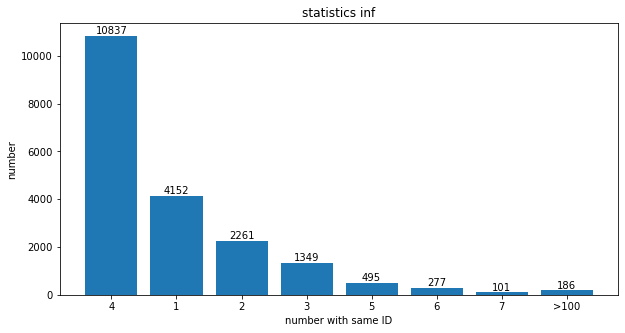

In [7]:
plt.figure(figsize=(10, 5)) 
x = range(len(statistics_inf))
y = statistics_inf.values()
name = statistics_inf.keys()
plt.bar(x,height=y)
plt.xticks(x,name)
plt.xlabel('number with same ID')
plt.ylabel('number')
plt.title('statistics inf')

for a, b, label in zip(x, y, y):
    plt.text(a, b, label, ha='center', va='bottom')

In [8]:
dataset_label_path = './data/label.txt'
dataset_img_path = './data/images'

train_list_path = './data/train/label.txt'
train_img_path =  './data/train/images'
test_list_path = './data/val/label.txt'
test_img_path =  './data/val/images'


if not os.path.exists(train_img_path):
    os.makedirs(train_img_path)
if not os.path.exists(test_img_path):
    os.makedirs(test_img_path)

In [9]:
dataset_file =  open(dataset_label_path, 'r')
train_file = open(train_list_path, 'w')
test_file = open(test_list_path, 'w')
number_test_ID = 2000
test_ID = list(ID_number.keys())[:number_test_ID]
counter = 0
for line in dataset_file.readlines():
    img_name,ID = line[:-1].split(":")
    source = os.path.join(dataset_img_path,img_name)
    if ID in test_ID:
        test_file.write(line)
        target = os.path.join(test_img_path,img_name)
    else:
        train_file.write(line)
        target = os.path.join(train_img_path,img_name)
    shutil.copy(source, target)
train_file.close()
test_file.close()